Используем дата сет Cancer_Data для классификации.
Обучим модель логистической регрессии с разными значениями скорости обучения C (обратное значение скорости обучения).




In [24]:
!pip install scikit-learn

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('/content/Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print("Количество пропущенных значений:")
print(df.isnull().sum())

Количество пропущенных значений:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

In [30]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [31]:
# Удаляем колонку с названием 'Unnamed', поскольку в ней все значения пропущенные
df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True)

In [32]:
# Удаляем колонку с названием 'id'
df.drop(columns=[col for col in df.columns if 'id' in col], inplace=True)

In [33]:
df.duplicated().sum()

0

In [34]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [35]:
# Преобразуем категориальные значения целевой переменной (‘M’ и ‘B’) в числовой формат
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [36]:
df['diagnosis'].unique()

array([1, 0])

In [37]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: ylabel='diagnosis'>

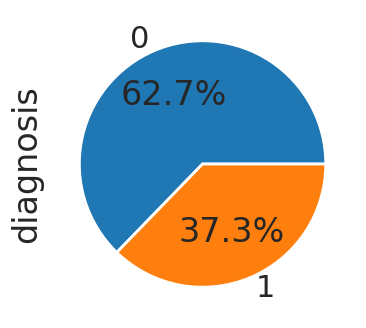

In [38]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [6,4]
df.groupby('diagnosis').size().plot(kind='pie',
                                       y = "diagnosis",
                                       label = "diagnosis",
                                       autopct='%1.1f%%')

Наблюдаем дисбаланс классов в данных. С долей 62.7% участников, не болеющих (класс "0"), и 37.3% участников, болеющих (класс "1"), набор данных имеет меньшее представительство одного из классов по сравнению с другим.

<ipython-input-39-38bbfaac726d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_diagnosis.index, y=correlation_with_diagnosis.values, palette='coolwarm')


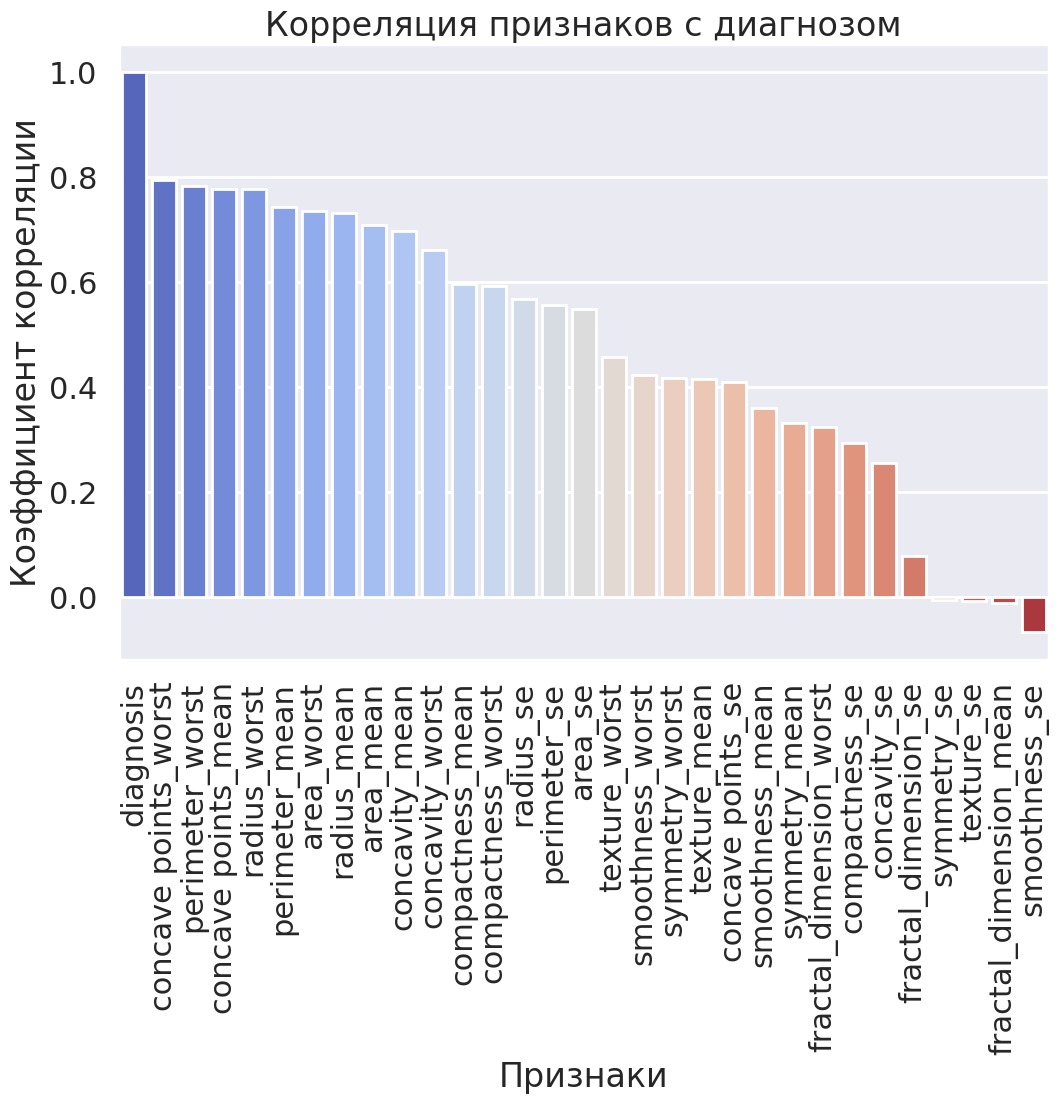

In [39]:
# Построим корреляционную матрицу с переменной 'diagnosis' (диагноз)
correlation_matrix = df.corr()

correlation_with_diagnosis = correlation_matrix['diagnosis'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_diagnosis.index, y=correlation_with_diagnosis.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Корреляция признаков с диагнозом')
plt.ylabel('Коэффициент корреляции')
plt.xlabel('Признаки')
plt.show()

In [40]:
# Разделение данных на признаки и целевую переменную
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Список значений C (обратного значения скорости обучения)
c_values = [0.01, 0.1, 1, 10, 100]

# Создание словаря для хранения результатов
results = {}

In [41]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [42]:
# Обучение и оценка модели логистической регрессии для разных значений C
for c in c_values:
    # Создание модели логистической регрессии
    model = LogisticRegression(C=c, solver='liblinear')

    # Замер времени обучения
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Сохранение результатов
    results[c] = {
        'training_time': training_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Вывод результатов для логистической регрессии
print("Результаты классификации логистической регрессии для разных значений C:")
for c, metrics in results.items():
    print(f"C: {c}")
    print(f"  Время обучения: {metrics['training_time']:.4f} секунд")
    print(f"  Точность: {metrics['accuracy']:.4f}")
    print(f"  Точность (Precision): {metrics['precision']:.4f}")
    print(f"  Полнота (Recall): {metrics['recall']:.4f}")
    print(f"  F1-мера: {metrics['f1_score']:.4f}")
    print()


Результаты классификации логистической регрессии для разных значений C:
C: 0.01
  Время обучения: 0.0152 секунд
  Точность: 0.9474
  Точность (Precision): 0.9744
  Полнота (Recall): 0.8837
  F1-мера: 0.9268

C: 0.1
  Время обучения: 0.0087 секунд
  Точность: 0.9649
  Точность (Precision): 0.9756
  Полнота (Recall): 0.9302
  F1-мера: 0.9524

C: 1
  Время обучения: 0.0076 секунд
  Точность: 0.9561
  Точность (Precision): 0.9750
  Полнота (Recall): 0.9070
  F1-мера: 0.9398

C: 10
  Время обучения: 0.0086 секунд
  Точность: 0.9561
  Точность (Precision): 0.9750
  Полнота (Recall): 0.9070
  F1-мера: 0.9398

C: 100
  Время обучения: 0.0082 секунд
  Точность: 0.9561
  Точность (Precision): 0.9750
  Полнота (Recall): 0.9070
  F1-мера: 0.9398



Результаты показывают, как меняется качество и скорость обучения модели логистической регрессии при изменении параметра C, который является обратным значением скорости обучения.

Точность (Accuracy): точность модели колеблется в диапазоне 0.94-0.96, что говорит о высоком уровне правильных предсказаний.
Точность (Precision): достаточно стабильна (0.97-0.98), что указывает на то, что модель редко ошибается, когда предсказывает наличие заболевания.
Полнота (Recall): ниже (0.88-0.93), что означает, что модель может пропускать некоторые случаи заболевания.
F1-мера: усредненное значение точности и полноты, баланс между этими показателями.
Время обучения: практически не меняется при разных значениях C, что говорит о том, что выбор C в этом случае не сильно влияет на скорость обучения.

Чем выше значение C, тем меньше регуляризация (уменьшение веса признаков).
Слишком высокое C: модель может переобучиться (overfitting), хорошо работая на обучающей выборке, но плохо обобщаясь на новые данные.
Слишком низкое C: модель может недообучиться (underfitting), не захватывая важные зависимости в данных.

С нашем случае оптимальное значение C находится в диапазоне от 0.1 до 10. Хотя точность модели не сильно отличается для этих значений, F1-мера немного выше при C = 0.1.

In [46]:
# Обучение модели с использованием стохастического градиентного спуска (SGD)
sgd_model = SGDClassifier(loss='log_loss', penalty='l2', random_state=42)
start_time = time.time()
sgd_model.fit(X_train, y_train)
end_time = time.time()
training_time_sgd = end_time - start_time

y_pred_sgd = sgd_model.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

# Вывод результатов для SGD
print("Результаты классификации с использованием стохастического градиентного спуска (SGD):")
print(f"  Время обучения: {training_time_sgd:.4f} секунд")
print(f"  Точность: {accuracy_sgd:.4f}")
print(f"  Точность (Precision): {precision_sgd:.4f}")
print(f"  Полнота (Recall): {recall_sgd:.4f}")
print(f"  F1-мера: {f1_sgd:.4f}")
print()

Результаты классификации с использованием стохастического градиентного спуска (SGD):
  Время обучения: 0.0134 секунд
  Точность: 0.9561
  Точность (Precision): 0.9524
  Полнота (Recall): 0.9302
  F1-мера: 0.9412



In [49]:
# Сравнение скорости сходимости и качества моделей
print("Сравнение скорости сходимости и качества моделей:")
print(f"  Стандартный градиентный спуск (логистическая регрессия) - время обучения: {min(results.values(), key=lambda x: x['training_time'])['training_time']:.4f} секунд") # итерация по значениям словаря "результаты" вместо ключей
print(f"  Стохастический градиентный спуск (SGD) - время обучения: {training_time_sgd:.4f} секунд")

Сравнение скорости сходимости и качества моделей:
  Стандартный градиентный спуск (логистическая регрессия) - время обучения: 0.0076 секунд
  Стохастический градиентный спуск (SGD) - время обучения: 0.0134 секунд


In [50]:
# Обучение модели логистической регрессии с разными оптимизаторами
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
results_solvers = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_solvers[solver] = {
        'training_time': training_time,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Вывод результатов для разных оптимизаторов
print("\nРезультаты классификации с использованием разных оптимизаторов:")
for solver, metrics in results_solvers.items():
    print(f"Оптимизатор: {solver}")
    print(f"  Время обучения: {metrics['training_time']:.4f} секунд")
    print(f"  Точность: {metrics['accuracy']:.4f}")
    print(f"  Точность (Precision): {metrics['precision']:.4f}")
    print(f"  Полнота (Recall): {metrics['recall']:.4f}")
    print(f"  F1-мера: {metrics['f1_score']:.4f}")
    print()


Результаты классификации с использованием разных оптимизаторов:
Оптимизатор: liblinear
  Время обучения: 0.0121 секунд
  Точность: 0.9561
  Точность (Precision): 0.9750
  Полнота (Recall): 0.9070
  F1-мера: 0.9398

Оптимизатор: lbfgs
  Время обучения: 0.0710 секунд
  Точность: 0.9649
  Точность (Precision): 0.9756
  Полнота (Recall): 0.9302
  F1-мера: 0.9524

Оптимизатор: newton-cg
  Время обучения: 0.1424 секунд
  Точность: 0.9561
  Точность (Precision): 0.9750
  Полнота (Recall): 0.9070
  F1-мера: 0.9398

Оптимизатор: sag
  Время обучения: 0.0338 секунд
  Точность: 0.9474
  Точность (Precision): 0.9744
  Полнота (Recall): 0.8837
  F1-мера: 0.9268

Оптимизатор: saga
  Время обучения: 0.0417 секунд
  Точность: 0.9474
  Точность (Precision): 0.9744
  Полнота (Recall): 0.8837
  F1-мера: 0.9268




‘lbfgs’ показал наилучшую точность (0.9649) и F1-меру (0.9524), но затратил больше всего времени на обучение (0.0710 секунд), хорош для небольших и средних датасетов

‘liblinear’, также хорош для небольших датасетов, как у нас, имеет схожие результаты по точности, полноте и F1-мере с ‘newton-cg’, около 0.94-0.96, но ‘liblinear’ оказался намного быстрее (0.0121 секунды),
‘newton-cg’: дорогостоящий, требует много ресурсов для больших датасетов.

‘sag’ и ‘saga’ имеют аналогичные результаты и время обучения, но их точность и F1-мера немного ниже (0.92-0.94).

Делаем вывод, что для быстрого обучения с хорошим качеством можно использовать ‘liblinear’.

Но в данном случае, мы работаем с постановкой диагноза и важна максимальная точность, лучшим выбором будет ‘lbfgs’, хотя он будет требовать больше времени.
